### Classification:
- Unlike regression where we predict a continuous number (real number), we use classification to predict a category. 
- Linear model: Logistic Regression, Support Vector Machine
- Non-linear model: K-NN, Kernel SVM, Random Forests.


In [1]:
import os, sys

sys.path.append(os.path.abspath("Datasets"))
sys.path.append(os.path.abspath("Images"))

### Logistic Regression
#### Linear Regression:
- Simple:
$$y = b_0 + b_1*x$$
- Multiple:
$$y = b_0 + b_1*x_1 + b_2*x_2 + ... + b_n*x_n$$

#### Classification problem:
<img src="Images/4_1_classification.JPG" height="450" width="300">
- We want to classify a data point belong to which action (Y/N). We see that, it's some sort of correlation. 
- Linear regression cannot be used in this problem:
<img src="Images/4_2_problem.JPG" height="450" width="300">
- Actually, the middle part (between 0 and 1 horizontal line) make sense, it means the people between those Ages can be chosen or not, and the chance increases as we move to the right. However, the tail and head of the line is not, because it's out of range. Therefore, it can be like this:
<img src="Images/4_3_solution.JPG" height="450" width="300">

#### Scientific Approach:
<img src="Images/4_4_scientific-approach.JPG" height="600" width="450">

- We can use the *logistic regression* to predict probability. Instead of predicting exactly the outcome, we just predict the probability $\hat{p}$

- Red points: actual values
- Blue points: predicted values
<img src="Images/4_5_predicted_outcome.JPG" height="600" width="450">
- We see that, people who are at 20 have only 0.7% of receiving the job.
- We cannot predict the actual value, so we predict the $\hat{y}$, based on the middle line 0.5:
<img src="Images/4_5_predicted_outcome_2.JPG" height="600" width="450">


### Implementing part

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dataset = pd.read_csv("Datasets/ML_a_z/Social_Network_Ads.csv")

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [8]:
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values # 0: not purchased, 1: purchased

In [13]:
# Split training set and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=0)

In [14]:
# Feature scaling:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [19]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)

In [20]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred = classifier.predict(X_test)

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(y_test, y_pred)

In [26]:
cm

array([[63,  5],
       [ 7, 25]])

#### Confusion Matrix
- True Positive, False Positive...
- 63 correct 1s, 25 correct 0s

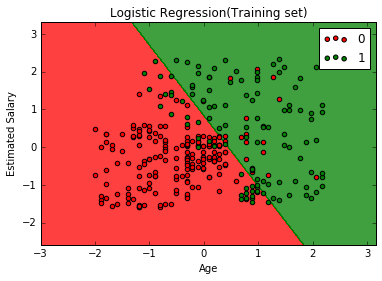

In [27]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min() - 1,
                              X_set[:, 0].max() + 1, 0.01),
                    np.arange(X_set[:, 1].min() - 1,
                             X_set[:, 1].max() + 1, 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1],
                c = ListedColormap(('red', 'green'))(i), label=j)
plt.title("Logistic Regression(Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

- Red: not buy
- Green: buy
### Goal of classification:
- To classify the right user to the right category.
- Plot the prediction region, the 2 red and green regions. 
- The points are the actual values (truth), and region is the prediction.
- For each new user, if the user belong to a region, he/she will be classified to that class.
- The line: prediction boundary.
- Logistic regression: because it's a linear classifier, so the boundary is a straight line. If we in a 3-D independent variables, it will be a plane.
- The classifier has done a good job, it caches most users in the correct region. However, there are also some "False", i.e: red points in green region, and vice versa. 
- The classifier is created using the **training_set**, so we want to know that the classifier will do a good job using the test_set (and also new observations in the future)


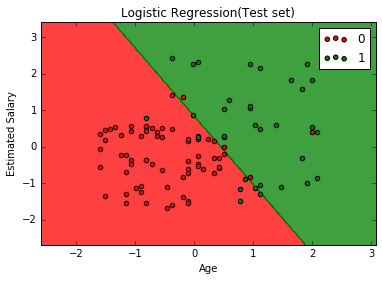

In [28]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min() - 1,
                              X_set[:, 0].max() + 1, 0.01),
                    np.arange(X_set[:, 1].min() - 1,
                             X_set[:, 1].max() + 1, 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1],
                c = ListedColormap(('red', 'green'))(i), label=j)
plt.title("Logistic Regression(Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

- Not bad! It looks very good
- Most red points in the red region, and green points in the green region.
- Ofcourse, there're also some "False"


```python

ListedColormap # Help to color the points

np.meshgrid(X1_range, X2_range) # min() - 1: so that the point will not lie on the axis, max() + 1 for the same issue

plt.contourf(X1, X2, Y) # Y must have the same dimension with X1, X2. That's why we need to reshape after prediction.


```
